<a href="https://colab.research.google.com/github/vinayshanbhag/filters/blob/main/Filters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install control;

In [19]:
import control as ct
import matplotlib.pyplot as plt

### RC lowpass

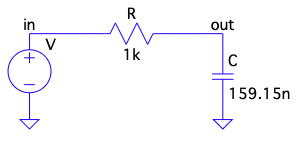

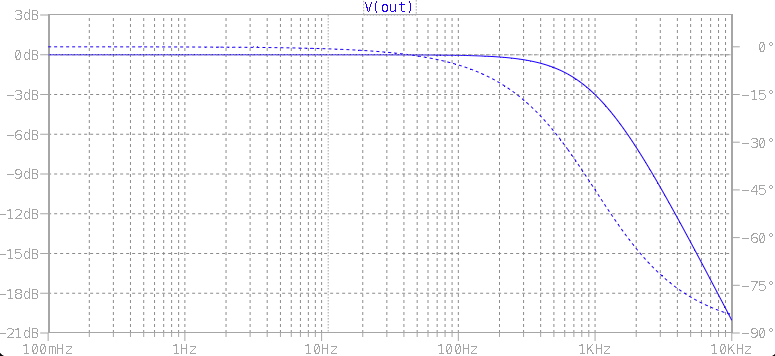


$V_{out} = V_{in} \times \frac{X_{c}}{(R+X_{c})}$

Capacitive reactance $X_{c} = \frac{1}{2πfC} = \frac{1}{jωC}$

$H(jω) = \frac{V_{out}}{V_{in}} = \frac{X_{c}}{(R+X_{c})} = \frac{\frac{1}{jωC}}{(R+\frac{1}{jωC})} = \frac{1}{1+jωRC}$

$H(s) = \frac{1}{1+sRC}$ where $s=jω$
<br/><br/>
* Gain is 1 (0dB) at 0 frequency (DC) and 0 at ∞
* Cutoff frequency ($f_{cutoff}$) is where the gain is halved (-3dB)

$\frac{V_{out}}{V_{in}} = \frac{X_{c}}{(R+X_{c})} = \frac{1}{2}$

$X_{c} = \frac{1}{2}(R+X_{c})$

$2X_{c} = (R+X_{c})$

$\therefore X_{c} = R$

$\because X_{c} = \frac{1}{2πfC}$

$\therefore f_{cutoff} = \frac{1}{2πRC}$ at cutoff

* Phase shift is given by $\arctan(ωRC)$
* Phase shift is $-45°$ at $f_{cutoff}$; approaches $0°$ at DC and $-90°$ at high frequencies
* There is single a pole at $sRC=-1$ in this filter. There are no
zeros (or there is a zero at infinity).
* Each pole creates a -20db/decade rolloff
* Number of poles is the number of independent energy storage (or delay) elements in the system.
* Load and source impedances affect performance


/usr/local/lib/python3.12/dist-packages/control/pzmap.py:327: FutureWarning: pole_zero_plot() return value of poles, zeros is deprecated; use pole_zero_map()
  warnings.warn(


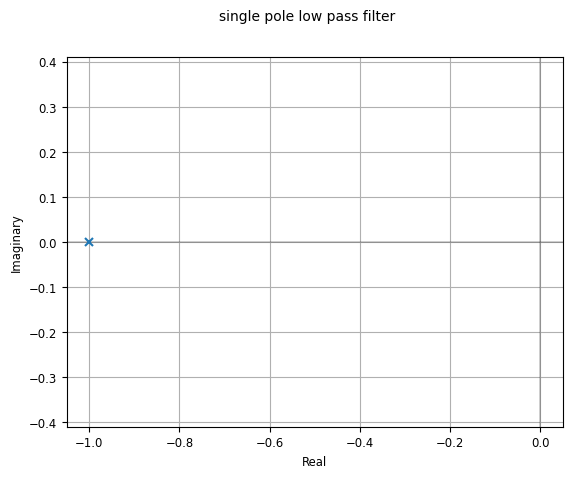

In [20]:
# transfer function coefficients
# Example: H(s) = (s + 2) / (s^2 + 2s + 3)
numerator = [1]
denominator = [1,1]
sys = ct.tf(numerator, denominator)
ct.pzmap(sys, plot=True, title='single pole low pass filter')
plt.grid(True);

### RC highpass

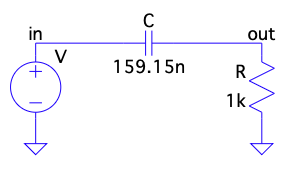

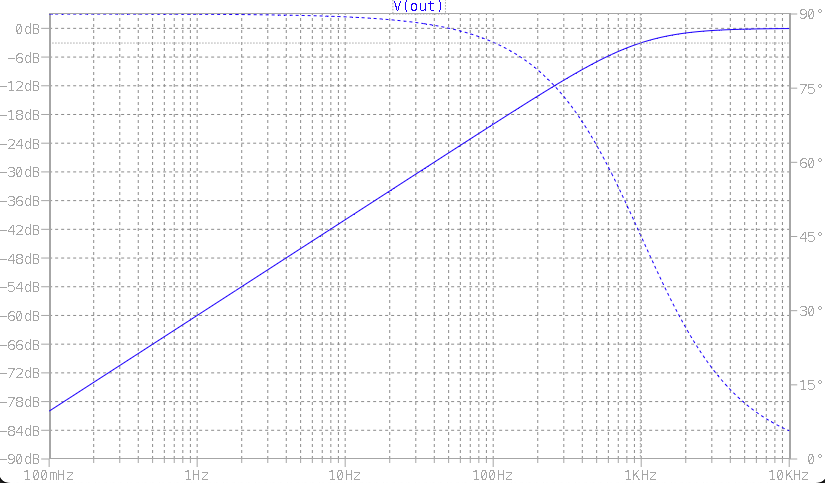

$V_{out} = V_{in} \times \frac{R}{(R+X_{c})}$

Capacitive reactance $X_{c} = \frac{1}{2πfC} = \frac{1}{jωC}$

$H(jω) = \frac{V_{out}}{V_{in}} = \frac{R}{(R+X_{c})} = \frac{R}{(R+\frac{1}{jωC})} = \frac{jωRC}{jωRC+1}$

$H(s) = \frac{sRC}{sRC+1}$ where $s=jω$
<br/><br/>
* Gain is 0 at DC and 1 (0dB) at high frequencies
* Cutoff frequency ($f_{cutoff}$) is where the power is halved (-3dB). Voltage gain is 0.5 (-6dB)

$\frac{V_{out}}{V_{in}} = \frac{R}{(R+X_{c})} = \frac{1}{2}$

$R = \frac{1}{2}(R+X_{c})$

$2R = (R+X_{c})$

$\therefore X_{c} = R$

$\because X_{c} = \frac{1}{2πfC}$

$\therefore f_{cutoff} = \frac{1}{2πRC}$ at cutoff

* Phase shift is given by $\arctan(\frac{X_{L}-X_{C}}{R})$
* Phase shift is $45°$ at $f_{cutoff}$; approaches $90°$ at DC and $0°$ at $∞$ frequency
* There is single a pole at $sRC=-1$ in this filter.
* There is a single zero at the origin
* Each pole creates a -20db/decade bend in the response
* Each zero creates a +20dB/decade bend in the response
* Number of poles is the number of independent energy storage (or delay) elements in the system.
* Load and source impedances affect performance


/usr/local/lib/python3.12/dist-packages/control/pzmap.py:327: FutureWarning: pole_zero_plot() return value of poles, zeros is deprecated; use pole_zero_map()
  warnings.warn(


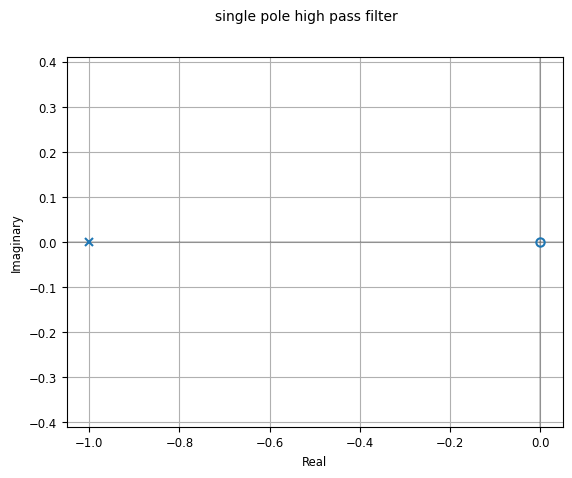

In [22]:
# transfer function coefficients
# Example: H(s) = (s + 2) / (s^2 + 2s + 3)
numerator = [1,0]
denominator = [1,1]
sys = ct.tf(numerator, denominator)
ct.pzmap(sys, plot=True, title='single pole high pass filter')
plt.grid(True);

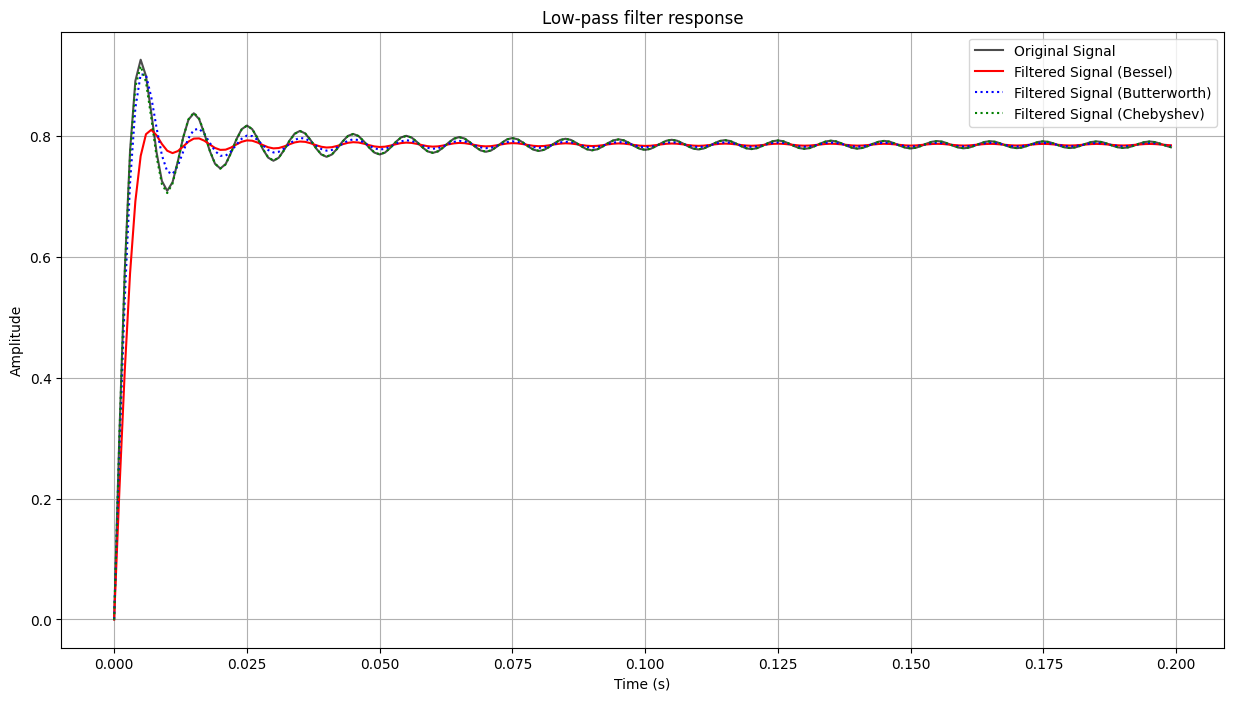

In [ ]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# Signal parameters
fs = 1000  # Sampling frequency (Hz)
T = 2      # Signal duration (seconds)
t = np.linspace(0, T, int(fs * T), endpoint=False)
f1 = 1    # Frequency of first sine wave (Hz)
f_noise = 0 # Frequency of noise (Hz)
signal_data = np.sin(2 * np.pi * f1 * t) + 0.01*np.sin(2 * np.pi * f_noise * t)
for i in range(3,100,2):
  signal_data += 1/i * np.sin(2 * np.pi * f1*i * t)

#filter parameters
order = 3       # Filter order
cutoff_freq = 100 # Cutoff frequency (Hz)
nyquist_freq = 0.5 * fs
normalized_cutoff = cutoff_freq / nyquist_freq

# Design the Bessel filter (second-order sections representation for stability)
sos = signal.bessel(order, normalized_cutoff, btype='low', output='sos')
# Apply the filter using sosfiltfilt for zero-phase filtering
filtered_signal = signal.sosfiltfilt(sos, signal_data)

bw = signal.butter(order,normalized_cutoff,btype='low',analog=False, output='sos')
filtered_bw_signal = signal.sosfiltfilt(bw, signal_data)

cheby1 = signal.cheby1(order,rp=0.1,Wn=normalized_cutoff,btype='low',analog=False, output='sos')
filtered_cheby1_signal = signal.sosfiltfilt(cheby1, signal_data)

# Plotting the results
seg=200 #plot segment
plt.figure(figsize=(15, 8))
plt.plot(t[:seg], signal_data[:seg], label='Original Signal', alpha=0.7, color='black', linestyle='solid')
plt.plot(t[:seg], filtered_signal[:seg], label='Filtered Signal (Bessel)', color='red', linestyle='solid')
plt.plot(t[:seg], filtered_bw_signal[:seg], label='Filtered Signal (Butterworth)', color='blue', linestyle=':')
plt.plot(t[:seg], filtered_cheby1_signal[:seg], label='Filtered Signal (Chebyshev)', color='green', linestyle=':')
plt.title('Low-pass filter response')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()